# datetime 알아보기

In [ ]:
from datetime import datetime
year = 2023
month = 12
day = 27
hour = 22
min = 58
sec = 27

In [ ]:
date = datetime(year, month, day, hour, min, sec)
print(date)

2023-12-27 22:58:27


In [ ]:
print(f'year = {date.year}')
print(f'month = {date.month}')
print(f'day = {date.day}')

year = 2023
month = 12
day = 27


## numpy

In [ ]:
import numpy as np

In [ ]:
# datetime64 => 64비트를 의미함
np.array(['2023-12-25', '2023-12-26', '2023-12-27'], dtype='datetime64')

# output
# array(['2023-12-25', '2023-12-26', '2023-12-27'], dtype='datetime64[D]')
# datetime64 뒤의 D는, Day를 의미한다. numpy의 datetime이 기본적으로 day 수준의 정밀도를 가짐을 의미함.
# 직접 코딩으로 Y(year)나 M(Month), ns(Nano Seconds) 등으로 바꿔줄 수 있음.

array(['2023-12-25', '2023-12-26', '2023-12-27'], dtype='datetime64[D]')

In [ ]:
print(np.array(['2023-12-25', '2023-12-26', '2023-12-27'], dtype='datetime64[M]'))
print(np.array(['2023-12-25', '2023-12-26', '2023-12-27'], dtype='datetime64[Y]'))

['2023-12' '2023-12' '2023-12']
['2023' '2023' '2023']


In [ ]:
# 2023-12-01 ~ 2023-12-27 사이의 날짜를 7Day 간격으로 반환. 간격 값을 제외하면 Day, Month 등의 사용자가 지정한 단위로 모든 값이 반환됨.
np.arange('2023-12-01', '2023-12-27', 7, dtype='datetime64[D]')

array(['2023-12-01', '2023-12-08', '2023-12-15', '2023-12-22'],
      dtype='datetime64[D]')

## pandas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

!pip install koreanize-matplotlib
import koreanize_matplotlib

In [ ]:
# pd.date_range(start date, periods, frequency)

# pd.date_range('2024-01-01', periods=7, freq='D') # => D는 Day를 의미함. Y는 year, M은 Month.
# output
# DatetimeIndex(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
#                '2024-01-05', '2024-01-06', '2024-01-07'],
#               dtype='datetime64[ns]', freq='D')

# 아래 형식의 start date 형식도 가능함.
pd.date_range('Jan, 01, 2024', periods=7, freq='D')

DatetimeIndex(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05', '2024-01-06', '2024-01-07'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
# random data를 이용한 분석.
data = np.random.randn(3,2)
cols = ['A', 'B']
idx = pd.date_range('2024-01-01', periods=3, freq='D')

df = pd.DataFrame(data=data, index=idx, columns=cols)
df

,A,B
2024-01-01,0.705428,-1.011043
2024-01-02,0.144935,-0.621239
2024-01-03,0.690951,-0.541155


In [ ]:
print(f"df의 index의 데이터 형식 : {df.index}")
print(f"df의 index 중 최대값 : {df.index.max()}")
print(f"df의 index 중 최소값 : {df.index.min()}")
print(f"df의 index의 위치 중 최대값 : {df.index.argmax()}")
print(f"df의 index의 위치 중 최소값 : {df.index.argmin()}")

df의 index의 데이터 형식 : DatetimeIndex(['2024-01-01', '2024-01-02', '2024-01-03'], dtype='datetime64[ns]', freq='D')
df의 index 중 최대값 : 2024-01-03 00:00:00
df의 index 중 최소값 : 2024-01-01 00:00:00
df의 index의 위치 중 최대값 : 2
df의 index의 위치 중 최소값 : 0


# time resampling

In [ ]:
# starbucks.csv 데이터 사용

# index_col='Date' => 데이터의 'Date'를 컬럼으로 사용 / parse_dates=True => 'Date'컬럼의 데이터 형식을 Datetime으로 변경.
starbucks = pd.read_csv("starbucks.csv", index_col = 'Date', parse_dates=True)
starbucks

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548
...,...,...
2018-12-24,60.5600,6323252
2018-12-26,63.0800,16646238
2018-12-27,63.2000,11308081


In [ ]:
print(starbucks.info())
print('='*100)
starbucks.index

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2015-01-02 to 2018-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1006 non-null   float64
 1   Volume  1006 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 23.6 KB
None


DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

In [ ]:
# resample 하기.
# .resample(rule).집계함수
# 집계함수는 min, mean, max, sum, std 등등...

starbucks.resample(rule='A').mean()
# 각 연도별 Close와 Volume의 평균을 구함.

,Close,Volume
Date,,
2015-12-31,50.078100,8.649190e+06
2016-12-31,53.891732,9.300633e+06
2017-12-31,55.457310,9.296078e+06
2018-12-31,56.870005,1.122883e+07


In [ ]:
# 이미 있는 집계함수들 외에도 직접 집계함수를 정의해서 사용하는 것도 가능. 예를 들어,
# 해당 날짜의 첫번째 entry(첫 번째 close와 첫 번째 volume)을 반환하는 함수는

def first_day(entry):
    if len(entry):   # => if len(entry) != 0과 같은 구문.
          return entry[0]

In [ ]:
display(starbucks.resample(rule='A').apply(first_day))
display(starbucks.head())
# 하지만, 이렇게 직접 정의하는건 실수가 잦을 수 있으니 그냥 이미 있는 집계함수를 쓰도록 하자.

,Close,Volume
Date,,
2015-12-31,38.0061,6906098
2016-12-31,55.0780,13521544
2017-12-31,53.1100,7809307
2018-12-31,56.3243,7215978


,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [ ]:
# 한 컬럼에 대해서만 resample
print(starbucks.Close.resample(rule='A').mean())
print(starbucks.Volume.resample(rule='A').mean())

Date
2015-12-31    50.078100
2016-12-31    53.891732
2017-12-31    55.457310
2018-12-31    56.870005
Freq: A-DEC, Name: Close, dtype: float64
Date
2015-12-31    8.649190e+06
2016-12-31    9.300633e+06
2017-12-31    9.296078e+06
2018-12-31    1.122883e+07
Freq: A-DEC, Name: Volume, dtype: float64


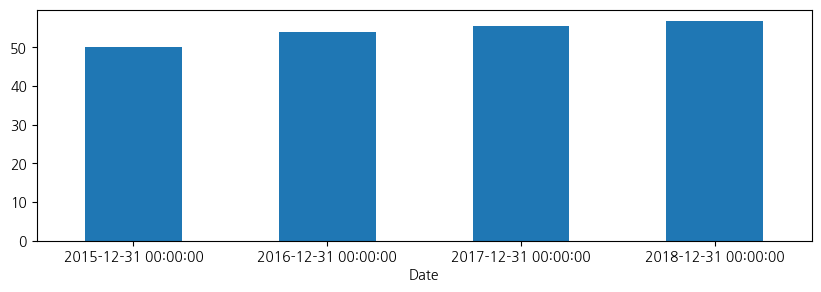

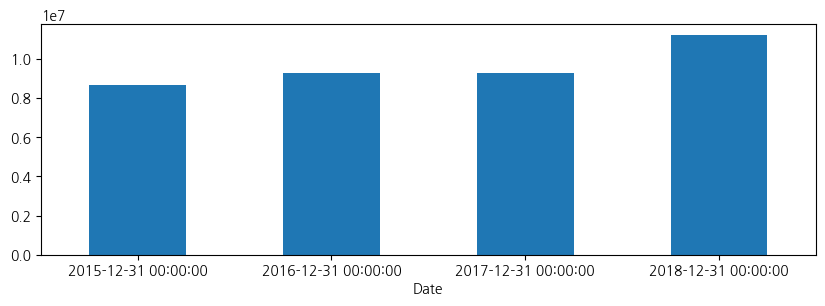

In [123]:
starbucks.Close.resample(rule='A').mean().plot.bar(figsize=(10,3))
plt.xticks(rotation=0)
plt.show()

starbucks.Volume.resample(rule='A').mean().plot.bar(figsize=(10,3))
plt.xticks(rotation=0)
plt.show()

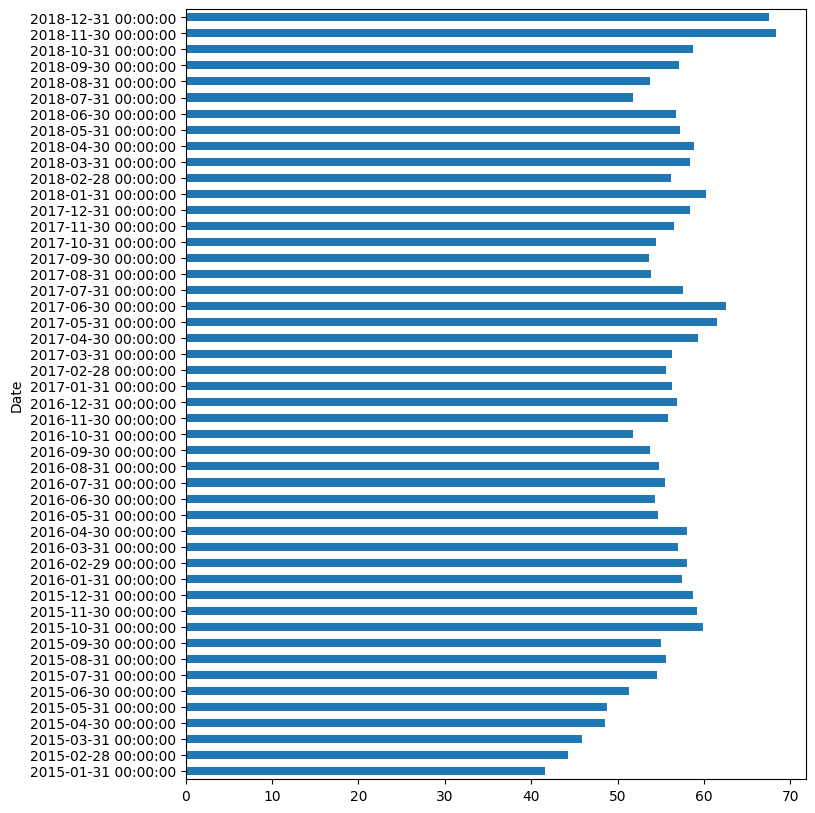

In [ ]:
starbucks.Close.resample(rule='M').max().plot.barh(figsize=(8,10))
plt.xticks(rotation=0)
plt.show()

In [ ]:
## resample rule
# ALIAS	DESCRIPTION

# B	: business day frequency
# C	: custom business day frequency (experimental)
# D	: calendar day frequency
# W	: weekly frequency
# M	: month end frequency
# SM : semi-month end frequency (15th and end of month)
# BM : business month end frequency
# CBM : custom business month end frequency
# MS : month start frequency
# SMS : semi-month start frequency (1st and 15th)
# BMS : business month start frequency
# CBMS : custom business month start frequency
# Q	: quarter end frequency
# BQ : business quarter endfrequency
# QS : quarter start frequency
# BQS : business quarter start frequency
# A	: year end frequency
# BA : business year end frequency
# AS : year start frequency
# BAS : business year start frequency
# BH : business hour frequency
# H	: hourly frequency
# T, min : minutely frequency
# S	: secondly frequency
# L, ms : milliseconds
# U, us	: microseconds
# N	: nanoseconds

# time shifting

In [ ]:
# starbucks.csv 데이터 사용

# index_col='Date' => 데이터의 'Date'를 컬럼으로 사용 / parse_dates=True => 'Date'컬럼의 데이터 형식을 Datetime으로 변경.
starbucks = pd.read_csv("starbucks.csv", index_col = 'Date', parse_dates=True)

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548
...,...,...
2018-12-24,60.5600,6323252
2018-12-26,63.0800,16646238
2018-12-27,63.2000,11308081


In [ ]:
# .shift()
# .shift(periods: 'int' = 1, freq: 'Frequency | None' = None, axis: 'Axis' = 0, fill_value: 'Hashable' = pandas._libs.lib._NoDefault instance)
# 괄호 안의 숫자만큼, 인덱스와 관계없이 모든 "값" 을 행 단위로 위,아래로 이동시킴.

display(starbucks)
print('='*100)
display(starbucks.shift(1))
print('='*100)
display(starbucks.shift(2))
print('='*100)
display(starbucks.shift(-1))

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548
...,...,...
2018-12-24,60.5600,6323252
2018-12-26,63.0800,16646238
2018-12-27,63.2000,11308081


,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,38.0061,6906098.0
2015-01-06,37.2781,11623796.0
2015-01-07,36.9748,7664340.0
2015-01-08,37.8848,9732554.0
...,...,...
2018-12-24,61.3900,23524888.0
2018-12-26,60.5600,6323252.0
2018-12-27,63.0800,16646238.0


,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,38.0061,6906098.0
2015-01-07,37.2781,11623796.0
2015-01-08,36.9748,7664340.0
...,...,...
2018-12-24,62.1500,20264918.0
2018-12-26,61.3900,23524888.0
2018-12-27,60.5600,6323252.0


,Close,Volume
Date,,
2015-01-02,37.2781,11623796.0
2015-01-05,36.9748,7664340.0
2015-01-06,37.8848,9732554.0
2015-01-07,38.4961,13170548.0
2015-01-08,37.2361,27556706.0
...,...,...
2018-12-24,63.0800,16646238.0
2018-12-26,63.2000,11308081.0
2018-12-27,63.3900,7712127.0


In [93]:
# 이번엔, 값이 아닌 인덱스를 이동시켜본다.
display(starbucks)
print('='*100)
display(starbucks.shift(1, freq='M'))

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548
...,...,...
2018-12-24,60.5600,6323252
2018-12-26,63.0800,16646238
2018-12-27,63.2000,11308081


,Close,Volume
Date,,
2015-01-31,38.0061,6906098
2015-01-31,37.2781,11623796
2015-01-31,36.9748,7664340
2015-01-31,37.8848,9732554
2015-01-31,38.4961,13170548
...,...,...
2018-12-31,60.5600,6323252
2018-12-31,63.0800,16646238
2018-12-31,63.2000,11308081


# rolling(), expanding()

In [94]:
# starbucks.csv 데이터 사용

# index_col='Date' => 데이터의 'Date'를 컬럼으로 사용 / parse_dates=True => 'Date'컬럼의 데이터 형식을 Datetime으로 변경.
starbucks = pd.read_csv("starbucks.csv", index_col = 'Date', parse_dates=True)

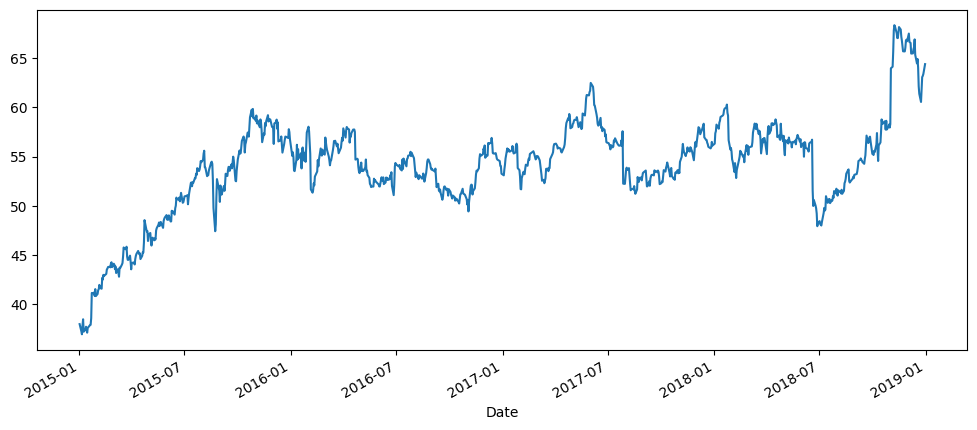

In [98]:
starbucks.Close.plot(figsize=(12,5))
plt.show()

## rolling()

In [102]:
# rolling() => 기간 이동 계산.  ex) 이동평균 계산.
# rolling() 메서드는 현재 열에 대하여 일정 크기의 창(window)를 이용하여 그 window안의 값을 추가 메서드(대부분 집계함수)를 통해 계산하는 메서드임.

# window : n개 행을 기준으로 window를 것임을 지정함. 일 데이터라면 n일, 주 데이터라면 n주, 월 데이터라면 n개월 ...
display(starbucks.head(10))
print('='*100)
starbucks.rolling(window=7).mean().head(10)

# 왜 앞의 6개 행 값은 NaN인가? => 행이 7개가 아니었기 때문.

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548
2015-01-09,37.2361,27556706
2015-01-12,37.4415,10021486
2015-01-13,37.7401,11040702
2015-01-14,37.5301,9295084


,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,NaN,NaN
2015-01-07,NaN,NaN
2015-01-08,NaN,NaN
2015-01-09,NaN,NaN
2015-01-12,37.616786,1.238222e+07
2015-01-13,37.578786,1.297288e+07
2015-01-14,37.614786,1.264020e+07


<Axes: xlabel='Date'>

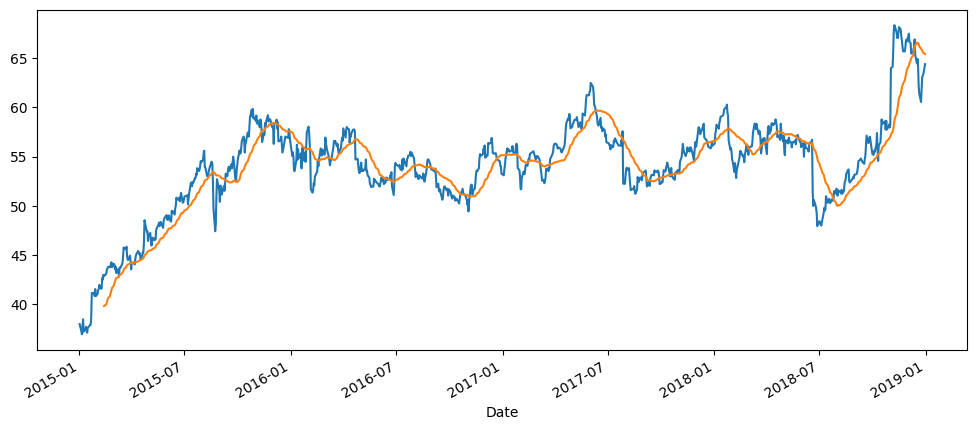

In [107]:
# 그래프 비교
starbucks.Close.plot(figsize=(12,5))
starbucks.Close.rolling(window=30).mean().plot(figsize=(12,5))

# 그래프의 앞쪽을 보면 알겠지만, window를 30으로 정했기 때문에 처음 29일간의 평균값은 없다.

<Axes: xlabel='Date'>

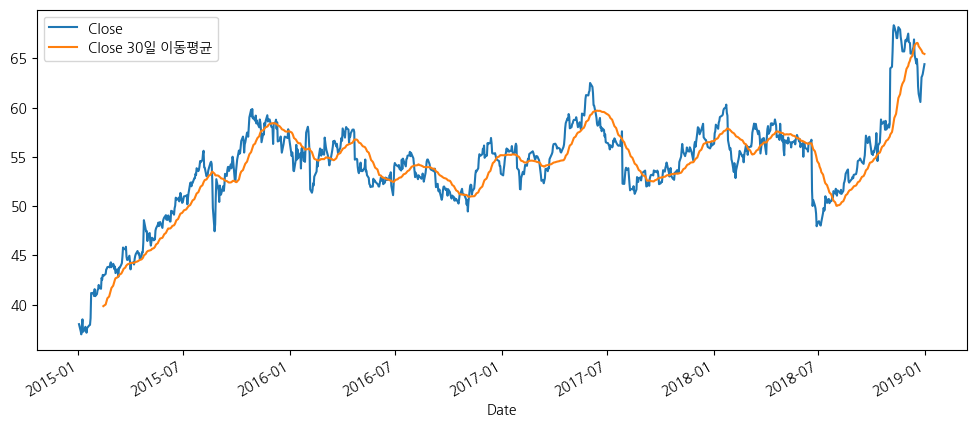

In [112]:
# 위의 그래프에 범례도 추가해 보자.

# 원 df에 rolling값 추가
starbucks['Close 30일 이동평균'] = starbucks.Close.rolling(window=30).mean()

# 원 데이터와 rolling 데이터를 list로 묶어서 plot
starbucks[['Close', 'Close 30일 이동평균']].plot(figsize=(12,5))

## expanding()

<Axes: xlabel='Date'>

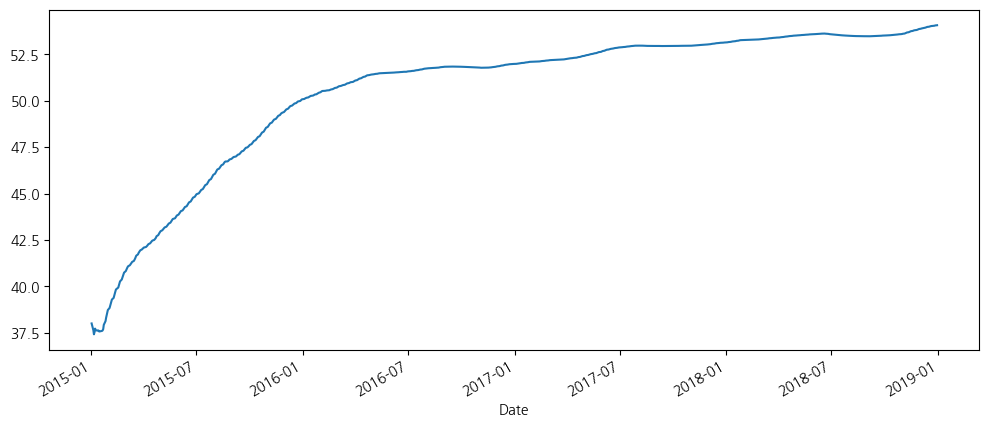

In [117]:
# expanding() : 누적 계산. 행이나 열의 값에 대해 누적으로 연산을 수행하는 메서드.
# 말 그대로, 값을 누적해 가면서 계산하는 것. df.expanding().sum() 처럼 추가 메서드를 이용하여 연산을 수행.

starbucks.Close.expanding().mean().plot(figsize=(12,5))

# time series data visualizaion

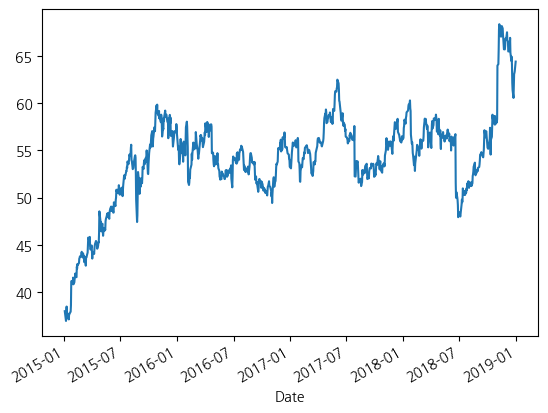

In [125]:
starbucks = pd.read_csv("starbucks.csv", index_col = 'Date', parse_dates=True)
starbucks.Close.plot();     # <Axes: xlabel='Date'>같은 문구를 없애주려면 plot()에 세미콜론(;)을 추가하면 됨.

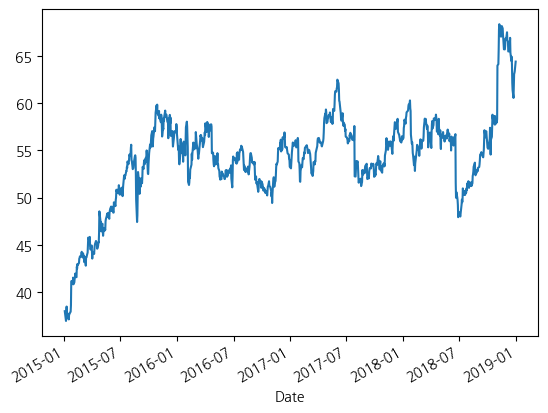

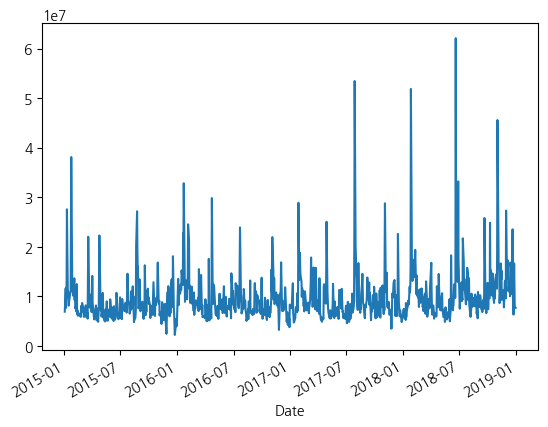

In [126]:
starbucks.Close.plot()
plt.show()

starbucks.Volume.plot()
plt.show()

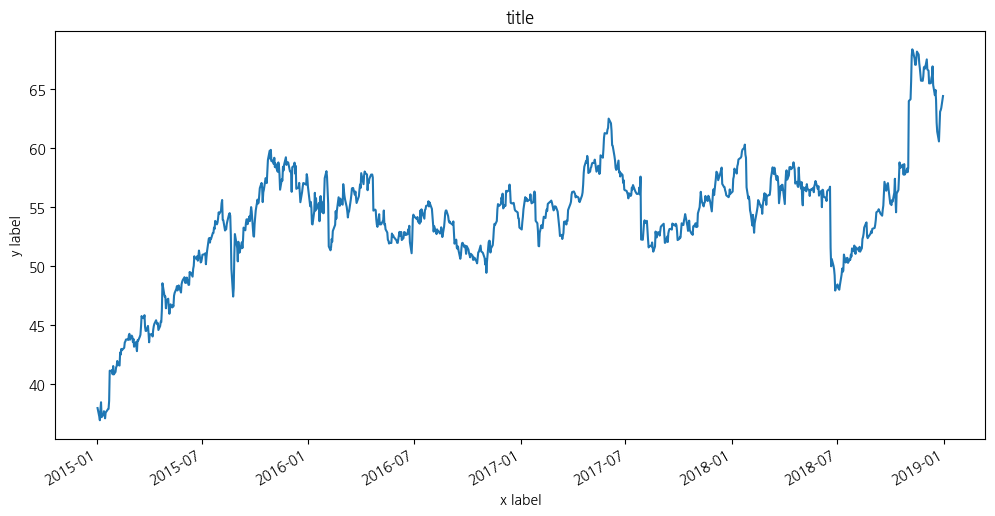

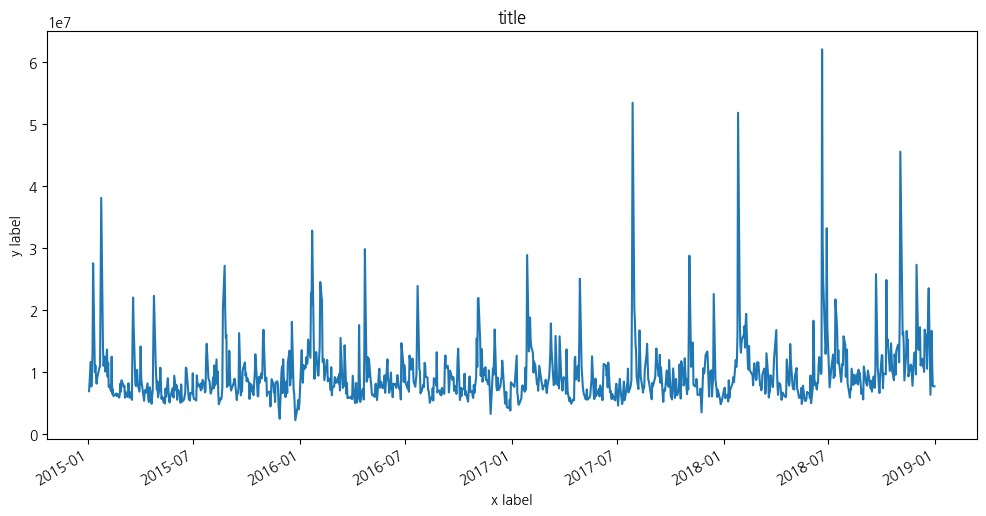

In [130]:
title='title'
xlabel='x label'
ylabel='y label'

starbucks.Close.plot(title=title, xlabel=xlabel, ylabel=ylabel, figsize=(12,6))
plt.show()

starbucks.Volume.plot(title=title, xlabel=xlabel, ylabel=ylabel, figsize=(12,6))
plt.show()

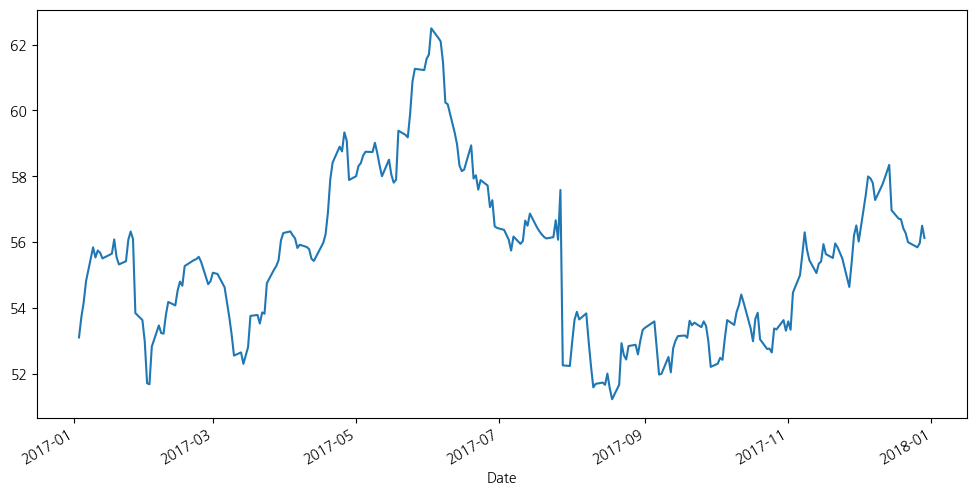

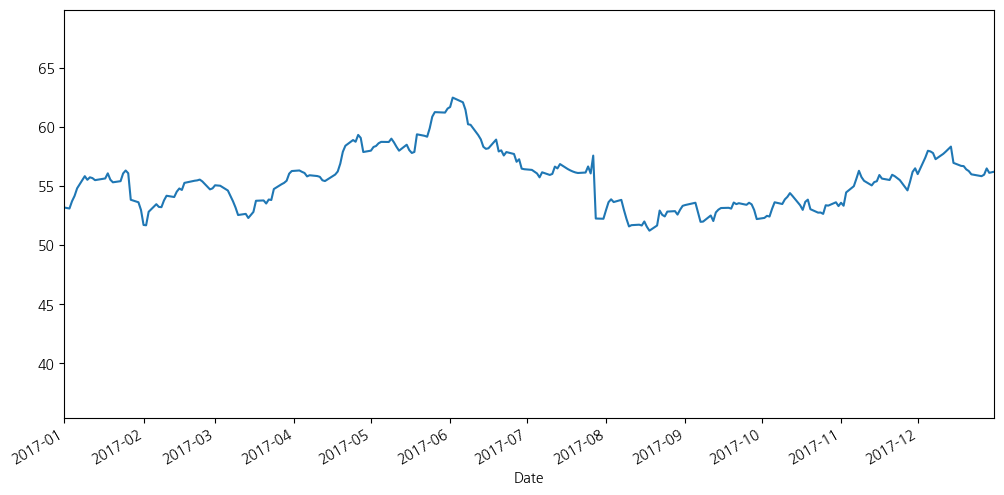

In [133]:
# 특정 날짜 구간만 plot하고 싶으면?

# 방법1. 데이터를 미리 편집하고 나서 plot
starbucks.Close['2017-01-01':'2017-12-31'].plot(figsize=(12,6))
plt.show()

# 방법2. 데이터를 plot하고 나서 x축 구간에 맞춰서 자름.
starbucks.Close.plot(figsize=(12,6), xlim=['2017-01-01', '2017-12-31'])
plt.show()

# 둘 다 결과는 같지만 y축 범위가 달라져서 다르게 보이는 것.

# y축 범위에 따라 보여지는 plot이 달라지므로, ylim을 추가해서 다르게 보이도록 plot할 수 있음.

## locator

In [134]:
from matplotlib import dates

<Axes: xlabel='Date'>

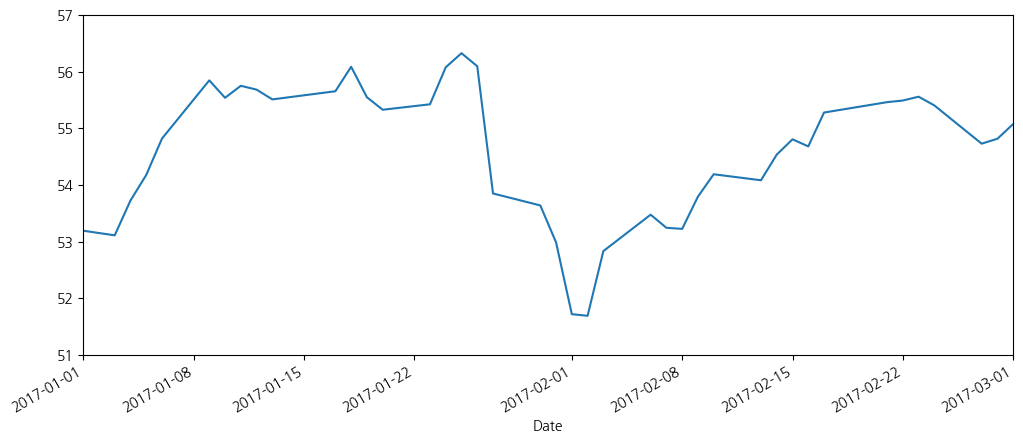

In [140]:
starbucks.Close.plot(xlim=['2017-01-01', '2017-03-01'], ylim=[51, 57], figsize=(12,5))

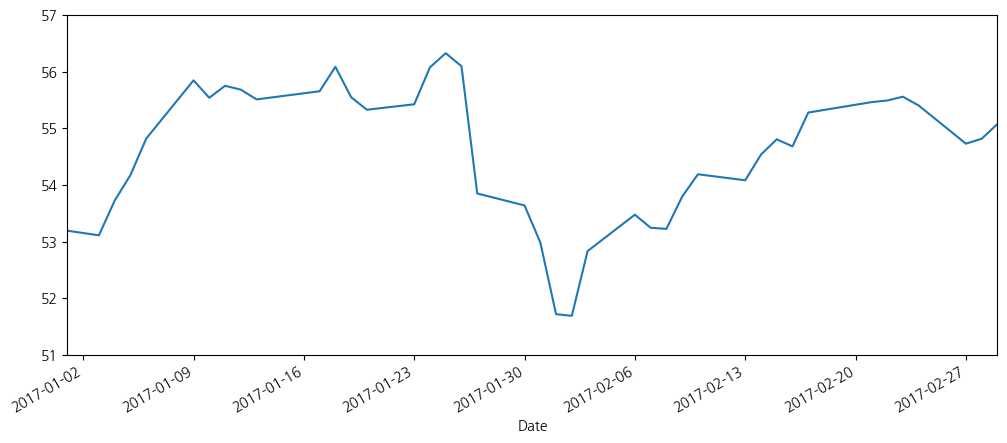

In [157]:
# 이런저런 커스터마이징을 해 보자.

# 다루고 싶은 시각화 코드를 ax로 지정
ax = starbucks.Close.plot(xlim=['2017-01-01', '2017-03-01'], ylim=[51, 57], figsize=(12,5))

# 1. 눈금 locator를 적용해보자. 눈금 간 간격을 일정하게 하는 것.
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))   # => dates.WeekdayLocator로 간격을 일주일 단위로 배치.

# 다른 locator에 대해서는 https://matplotlib.org/stable/api/dates_api.html 참고

## formatter

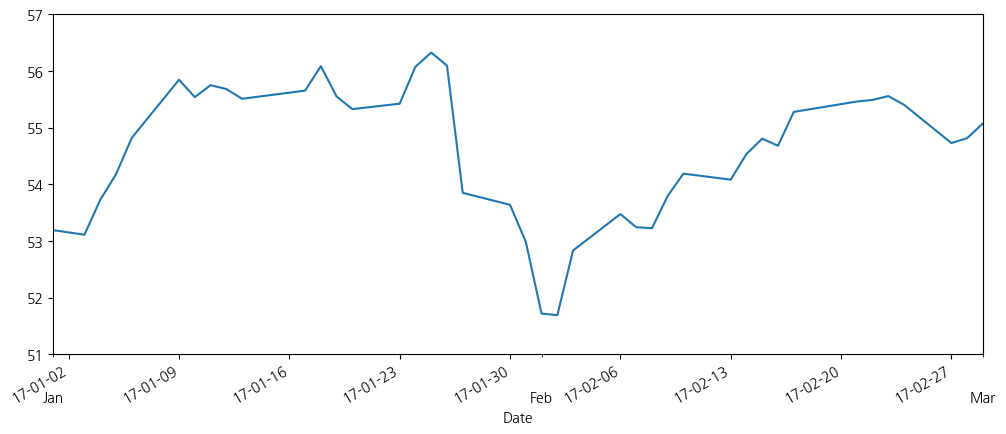

In [159]:
# 2. formatter 적용.

ax = starbucks.Close.plot(xlim=['2017-01-01', '2017-03-01'], ylim=[51, 57], figsize=(12,5))

# major : 주 축
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%y-%m-%d'))

# minor : 보조 축
ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b')) # => \n을 써 주지 않으면 주 축 날짜랑 겹쳐서 보기 힘듦. \n으로 한 줄 내려준 것.
# 다른 locator에 대해서는 https://matplotlib.org/stable/api/dates_api.html 참고

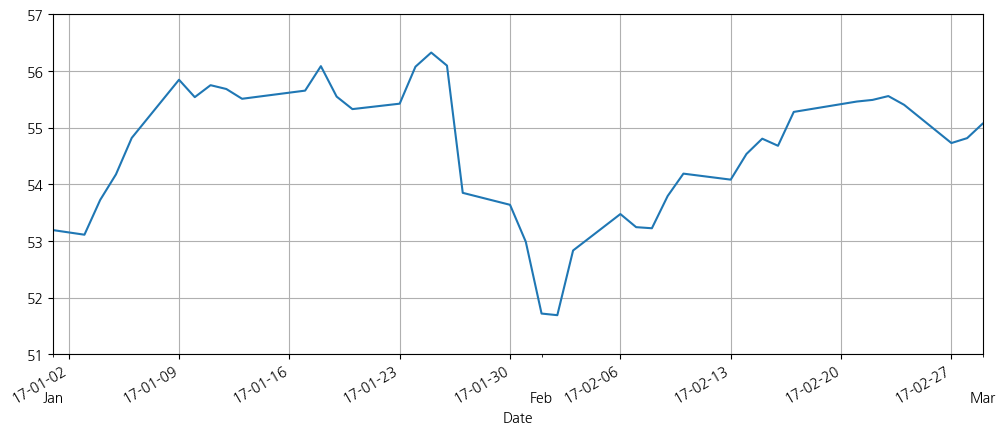

In [162]:
# 3. Grid 추가
ax = starbucks.Close.plot(xlim=['2017-01-01', '2017-03-01'], ylim=[51, 57], figsize=(12,5))

ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%y-%m-%d'))

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))

ax.yaxis.grid(True)
ax.xaxis.grid(True)

In [ ]:
# Dateformatter

# %Y : Year with century as a decimal number.
#  ex) 2001
# %y : Year without century as a zero-padded decimal number.
#  ex) 01
# %m : Month as a zero-padded decimal number.
#  ex) 02
# %B : Month as locale’s full name.
#  ex) February
# %b : Month as locale’s abbreviated name.
#  ex) Feb
# %d : Day of the month as a zero-padded decimal number.
#  ex) 03
# %A : Weekday as locale’s full name.
#  ex) Saturday
# %a : Weekday as locale’s abbreviated name.
#  ex) Sat
# % : Hour (24-hour clock) as a zero-padded decimal number.
#  ex) 16
# %I : Hour (12-hour clock) as a zero-padded decimal number.
#  ex) 04
# %p : Locale’s equivalent of either AM or PM.
#  ex) PM
# %M : Minute as a zero-padded decimal number.
#  ex) 05
# %S : Second as a zero-padded decimal number.
#  ex) 06
# %#m : Month as a decimal number. (Windows).
#  ex) 2
# %-m : Month as a decimal number. (Mac/Linux).
#  ex) 2
# %#x : Long date.
#  ex) Saturday, February 03, 2001
# %#c : Long date and time.
#  ex) Saturday, February 03, 2001 16:05:06